Filtered Data Shape: (459, 3)
          dt  AverageTemperature
0 2001-01-01           -4.480333
1 2001-02-01           -7.541000
2 2001-03-01            0.590333
3 2001-04-01            7.889000
4 2001-05-01           13.908667


/var/folders/6s/wrzy5l6n6fl_149gwsx1zk380000gn/T/ipykernel_5622/3598245843.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])


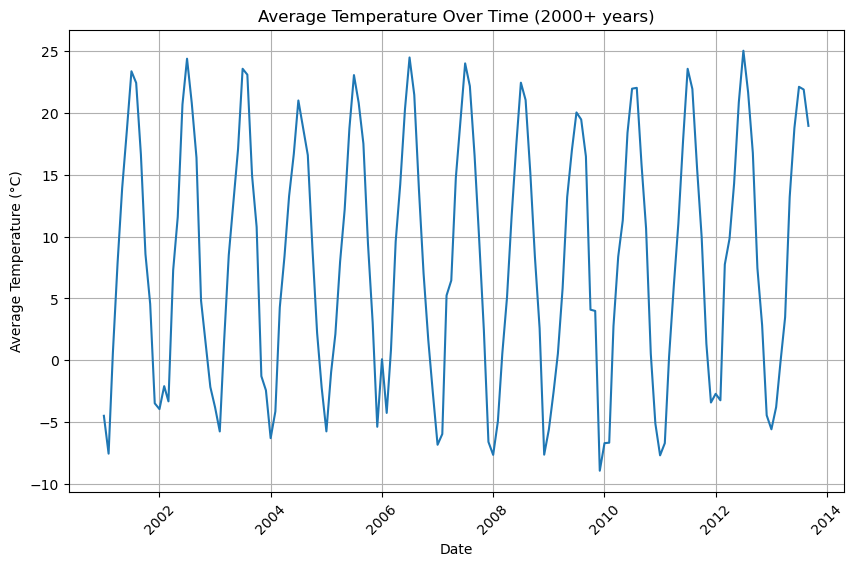

          dt  AverageTemperature  date_numeric
0 2001-01-01           -4.480333             0
1 2001-02-01           -7.541000            31
2 2001-03-01            0.590333            59
3 2001-04-01            7.889000            90
4 2001-05-01           13.908667           120
Fitted parameters: A = -13.89833575138202, t0 = 2.7029270066009046, P = 365.26746453077135, B = 8.1749239992465


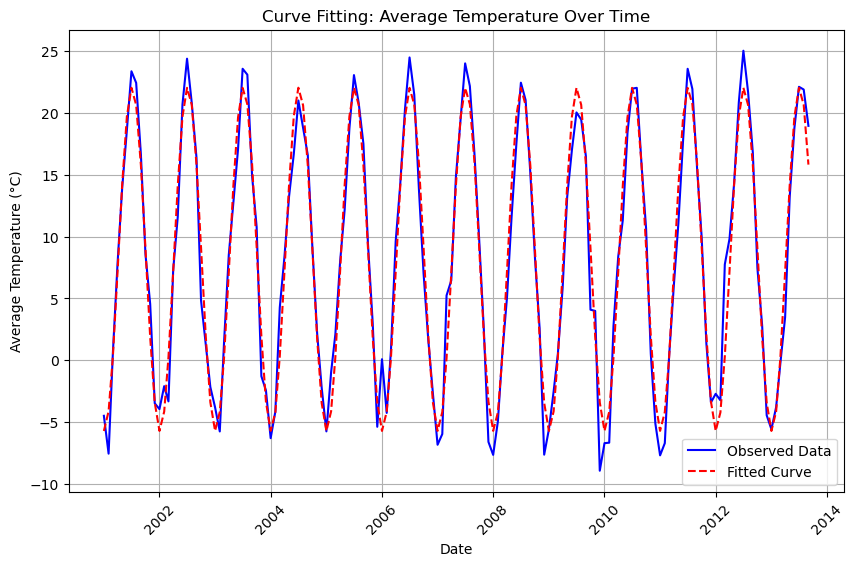

A = -13.89833575138202 ± 0.22650022650787038
t0 = 2.7029270066009046 ± 1.9059899174170638
P = 365.26746453077135 ± 0.26095076893254426
B = 8.1749239992465 ± 0.16069847684888433
Final equation: T(t) = -13.90 * cos(2π * (t - 2.70) / 365.27) + 8.17


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("/Users/christophersalapare/Downloads/GlobalLandTemperaturesByState.csv")

df_filtered = df[['dt', 'AverageTemperature', 'State']]

df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])
df_filtered = df_filtered[df_filtered['dt'].dt.year > 2000]

df_filtered = df_filtered[df_filtered['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

print(f"Filtered Data Shape: {df_filtered.shape}")  

df_avg_temp = df_filtered.groupby('dt')['AverageTemperature'].mean().reset_index()

print(df_avg_temp.head())

plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time (2000+ years)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df_avg_temp['date_numeric'] = (df_avg_temp['dt'] - df_avg_temp['dt'].min()).dt.days

print(df_avg_temp.head())

def model(t, A, t0, P, B):
    return A * np.cos(2 * np.pi * (t - t0) / P) + B

initial_guess = [10, 0, 365, 15]

params, covariance = curve_fit(model, df_avg_temp['date_numeric'], df_avg_temp['AverageTemperature'], p0=initial_guess)

A, t0, P, B = params
cov_A, cov_t0, cov_P, cov_B = np.diag(covariance)

print(f"Fitted parameters: A = {A}, t0 = {t0}, P = {P}, B = {B}")

fitted_data = model(df_avg_temp['date_numeric'], *params)

plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Observed Data', color='blue')
plt.plot(df_avg_temp['dt'], fitted_data, label='Fitted Curve', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Curve Fitting: Average Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

error_A = np.sqrt(cov_A)
error_t0 = np.sqrt(cov_t0)
error_P = np.sqrt(cov_P)
error_B = np.sqrt(cov_B)

print(f"A = {A} ± {error_A}")
print(f"t0 = {t0} ± {error_t0}")
print(f"P = {P} ± {error_P}")
print(f"B = {B} ± {error_B}")

print(f"Final equation: T(t) = {A:.2f} * cos(2π * (t - {t0:.2f}) / {P:.2f}) + {B:.2f}")
